In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
taxi = pd.read_csv(r"C:\Users\gurzh\Downloads\taxis.csv")
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
taxi.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


<Axes: xlabel='distance', ylabel='total'>

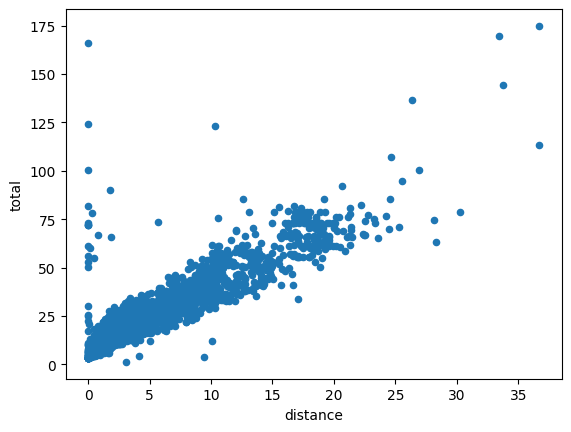

In [6]:
taxi.plot(x='distance', y='total', kind='scatter')

<Axes: xlabel='distance', ylabel='total'>

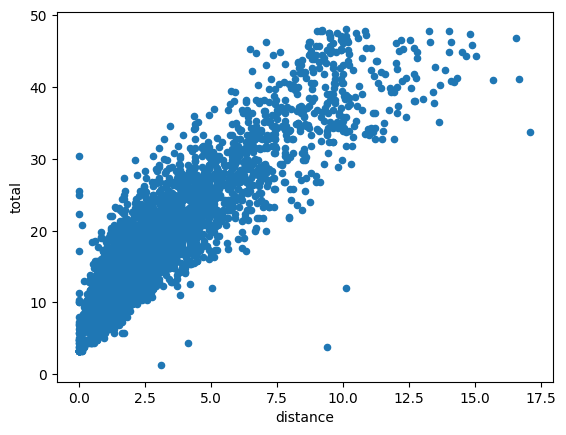

In [ ]:
quantile_95 = taxi['total'].quantile(.95)
taxi = taxi[taxi['total'] <= quantile_95]
taxi.plot(x='distance', y='total', kind='scatter', title='Total from distance', legend=)

In [4]:
taxi['pickup'] = pd.to_datetime(taxi['pickup'])
taxi['dropoff'] = pd.to_datetime(taxi['dropoff'])
taxi.insert(loc= 0, column='date', value=taxi['pickup'].dt.date)

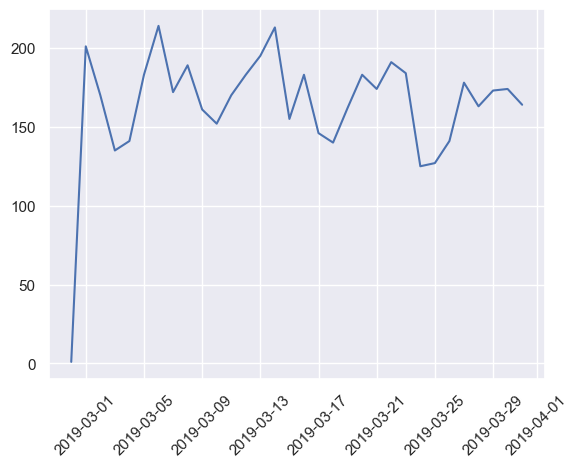

In [73]:
daily_rides = taxi.groupby('date', as_index=False)['pickup'].count()
daily_rides

plt.plot('date', 'pickup', data=daily_rides)
plt.xticks(rotation=45)
plt.show()

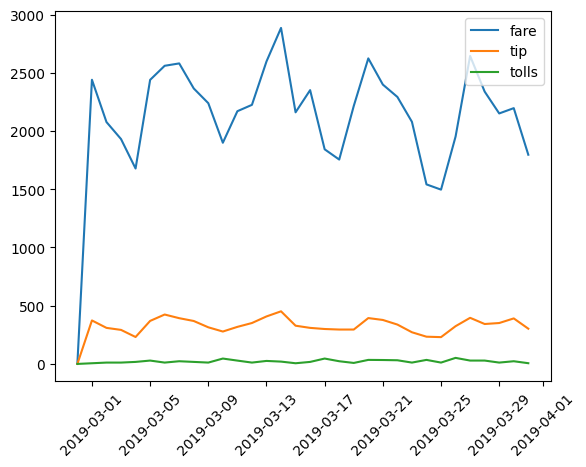

In [61]:
daily_value = taxi.groupby('date', as_index=False)[['fare', 'tip', 'tolls']].sum()

# Будуємо візуалізацію:
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']])

plt.xticks(rotation=45)
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')

plt.show()

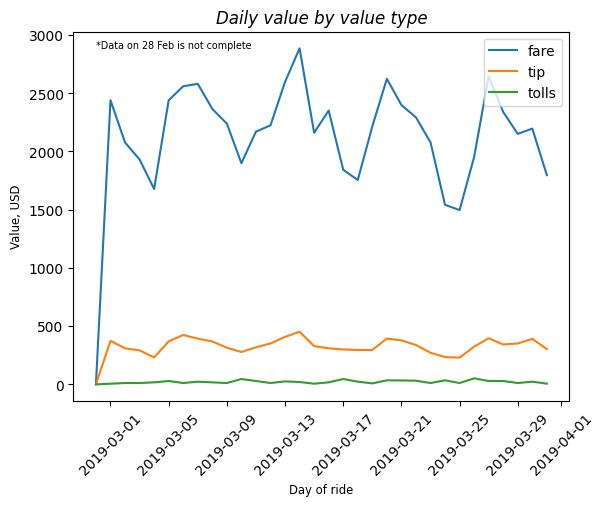

In [78]:
daily_value = taxi.groupby('date', as_index=False)[['fare', 'tip', 'tolls']].sum()

# А тепер будуємо візуалізацію:
plt.plot(daily_value['date'], daily_value['fare'],  # Перша крива - x1, y1
         daily_value['date'], daily_value['tip'],   # Друга крива - x2, y2
         daily_value['date'], daily_value['tolls']) # Третя крива - x3, y3

plt.xticks(rotation=45)
plt.legend(['fare', 'tip', 'tolls'], loc='upper right')
plt.xlabel('Day of ride', fontsize='small', color='black')
plt.ylabel('Value, USD', fontsize='small', color='black')
plt.title('Daily value by value type', fontsize='large', loc='center', fontstyle='italic')
plt.text(daily_value['date'].min(), daily_value['fare'].max(),  '*Data on 28 Feb is not complete', fontsize='x-small')

plt.show()

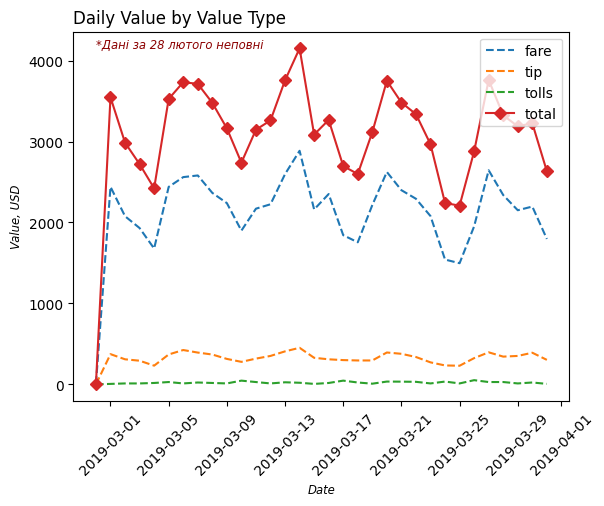

In [83]:
daily_value = taxi.groupby('date', as_index=False)[['fare', 'tip', 'tolls', 'total']].sum()

# Візуалізація
plt.plot(daily_value['date'], daily_value[['fare', 'tip', 'tolls']], linestyle='dashed')

# Окрема нова крива
plt.plot(daily_value['date'], daily_value['total'], linestyle='solid', marker='D')

# Поворот підписів
plt.xticks(rotation=45)

plt.title('Daily Value by Value Type', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Value, USD', fontsize='small', fontstyle='italic')
plt.text(daily_value['date'].min(),
         daily_value['total'].max(),    # Змінюємо fare -> total
         '*Дані за 28 лютого неповні', 
         color='#8B0000', 
         fontstyle='italic',
         fontsize='small')

plt.legend(['fare', 'tip', 'tolls', 'total'], loc='upper right')

plt.show()



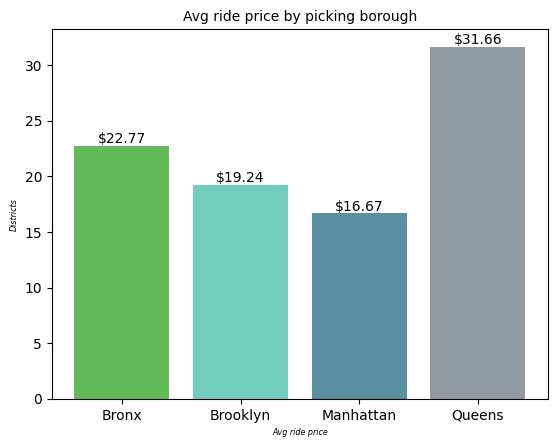

In [25]:
borough_avg_total = taxi.groupby('pickup_borough', as_index=False)['total'].mean()
plt.bar(borough_avg_total['pickup_borough'],
        borough_avg_total['total'],
        color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])
plt.ylabel('Districts', fontsize='xx-small', fontstyle='italic')
plt.xlabel('Avg ride price', fontsize='xx-small', fontstyle='italic')
plt.title('Avg ride price by picking borough', fontsize='medium', loc='center')
borough_avg_total = borough_avg_total.set_index('pickup_borough')
for borough in borough_avg_total.index:
    plt.text(borough, 
             borough_avg_total.loc[borough, 'total'], 
             '$'+str(round(borough_avg_total.loc[borough, 'total'], 2)), 
             ha='center',
             va='bottom')
plt.show()

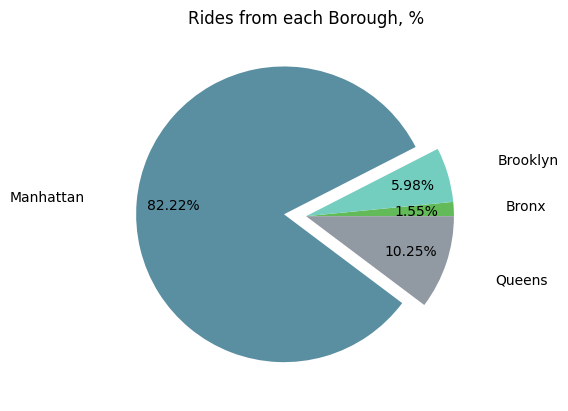

In [30]:
borough_rides = taxi.groupby('pickup_borough', as_index=False)['pickup'].count()
borough_rides
plt.pie(x=borough_rides['pickup'],
        labels=borough_rides['pickup_borough'],
         colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,)
plt.title('Rides from each Borough, %', fontsize='large')
plt.show()

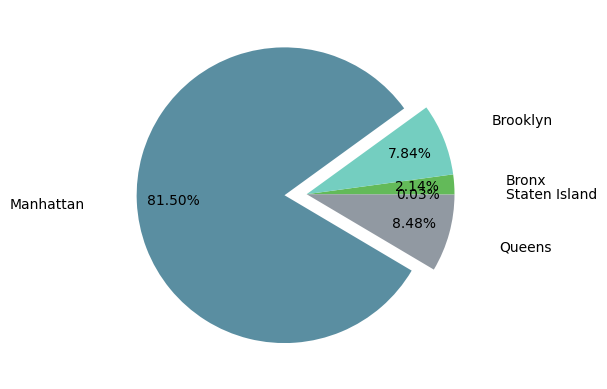

In [36]:
borough_dropoffs = taxi.groupby('dropoff_borough', as_index=False)['pickup'].count()
plt.pie(
    x=borough_dropoffs['pickup'],
    labels=borough_dropoffs['dropoff_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)
plt.show()

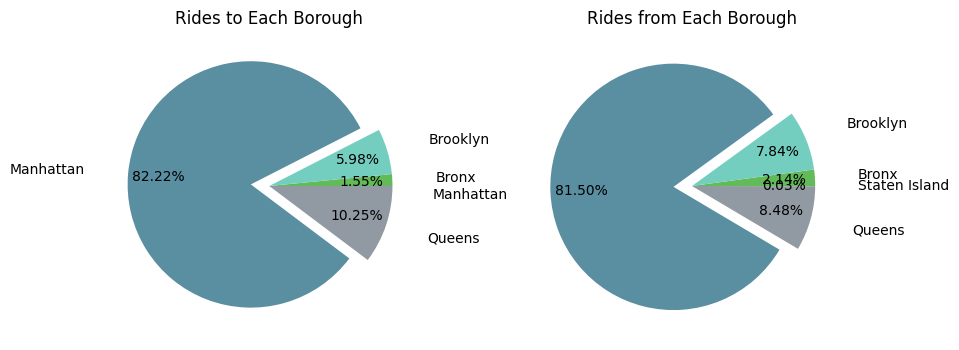

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].pie(x=borough_rides['pickup'],
        labels=borough_rides['pickup_borough'],
         colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
    
)
ax[0].set_title("Rides to Each Borough")
ax[1].pie(
     x=borough_dropoffs['pickup'],
    labels=borough_dropoffs['dropoff_borough'],
    colors=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'],
    explode=[0, 0, 0.15, 0, 0],
    autopct="%.2f%%",
    pctdistance=0.75,
    labeldistance=1.35,
)
ax[1].set_title('Rides from Each Borough')
plt.show()

C:\Users\gurzh\AppData\Local\Temp\ipykernel_9548\1859991032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')  # Формат меток
C:\Users\gurzh\AppData\Local\Temp\ipykernel_9548\1859991032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')  # Формат меток
C:\Users\gurzh\AppData\Local\Temp\ipykernel_9548\1859991032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')  # Формат меток
C:\Users\gurzh\AppData\Local\Temp\ipykernel_9548\1859991032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ti

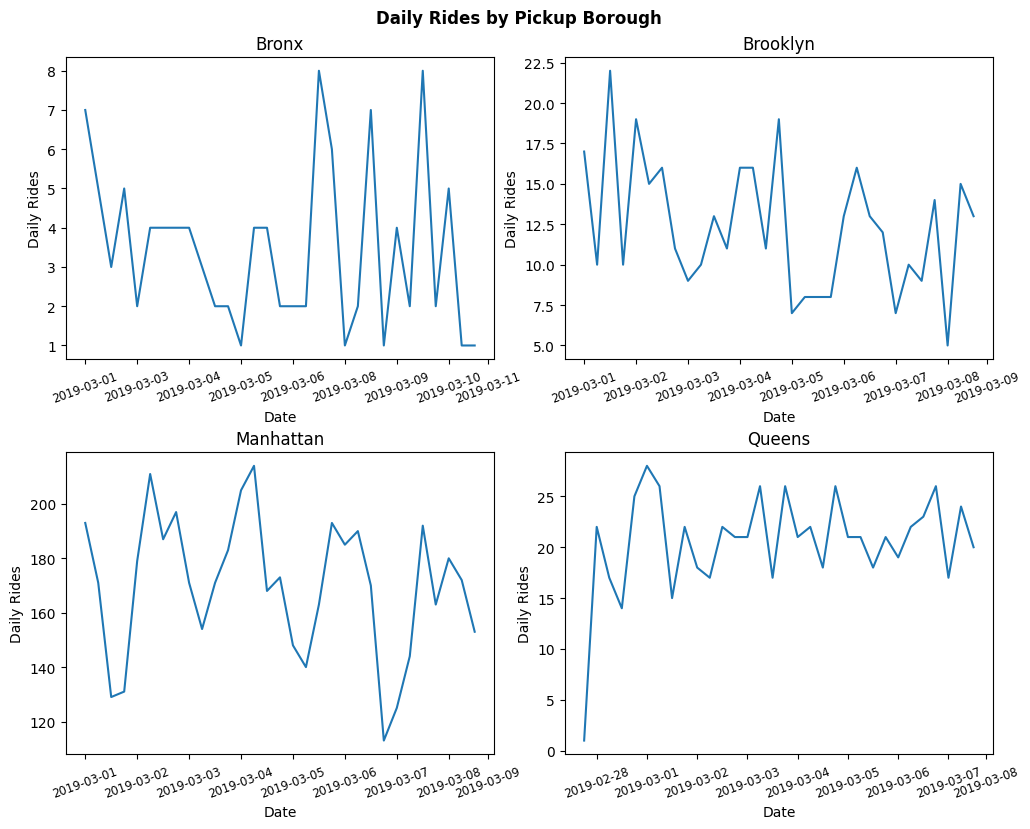

In [29]:
borough_by_daily_rides = taxi.groupby(['pickup_borough', 'date'], as_index=False)['pickup'].count()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.tight_layout(h_pad=5, w_pad=2)
borough_list = borough_by_daily_rides['pickup_borough'].unique()
for i in range(len(borough_list)):
    x = i // 2       # Координата у сітці по горизонталі (стовпець) - результат цілочисельного ділення на 2
    y = i % 2        # Координата у сітці по вертикалі (рядок) - остача від ділення на 2
    temp_df = borough_by_daily_rides[borough_by_daily_rides['pickup_borough'] == borough_list[i]]

    #print(temp_df)
    ax[x][y].plot('date', 'pickup', data=temp_df)
    ax[x][y].set_xticklabels(temp_df['date'], rotation=20, fontsize='small')  # Формат меток
    ax[x][y].set_xlabel('Date')
    ax[x][y].set_ylabel('Daily Rides')
    ax[x][y].set_title(borough_list[i])
fig.suptitle('Daily Rides by Pickup Borough', fontweight='bold')
fig.subplots_adjust(top=0.92)


In [ ]:
sns.get_dataset_names() # показать набор данных из библиотеки Seaborn. Они загружаются с помощью taxis = sns.load_dataset('name_dataset') 

<Axes: >

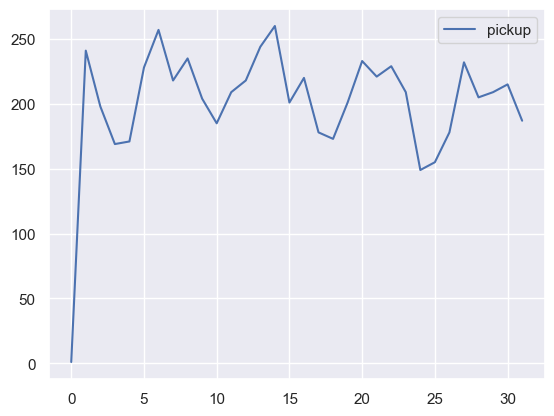

In [35]:
sns.set()

# Порахуємо кількість поїздок на день:
daily_rides = taxi.groupby('date', as_index=False)['pickup'].count()

# А тепер будуємо візуалізацію:
sns.lineplot(daily_rides)


<Axes: >

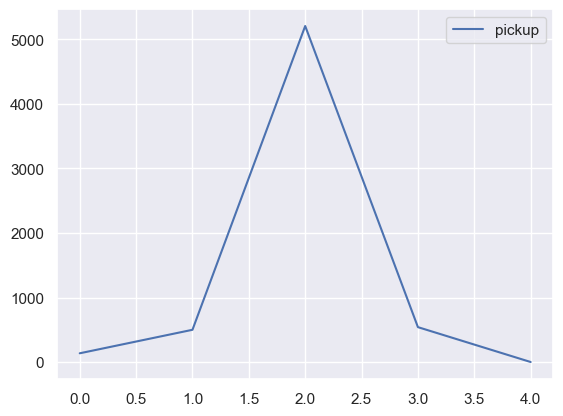

In [ ]:
borough_dropoffs = taxi.groupby('dropoff_borough', as_index=False)['pickup'].count()
sns.lineplot(borough_dropoffs)

C:\Users\gurzh\AppData\Local\Temp\ipykernel_9548\3450922500.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(daily_rides['date'], rotation=45)


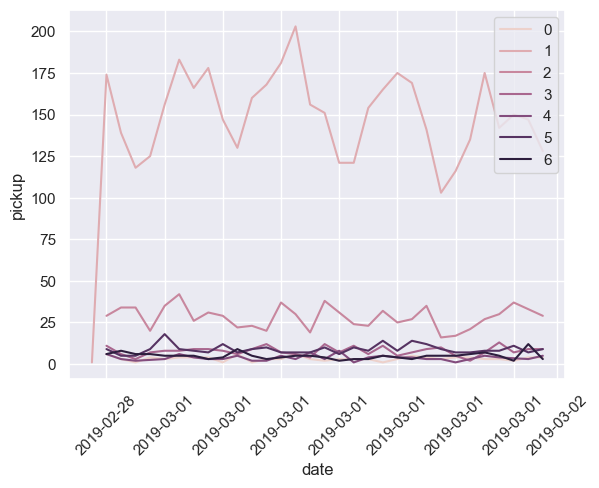

In [36]:
#добавляем к диаграмме разбивку на пассажиров. И этот столбец добавляем в параметр hue - все уникальные значения столбца Пассажиры будут разными цветами. 

daily_rides = taxi.groupby(['date', 'passengers'], as_index=False)['pickup'].count()

ax = sns.lineplot(daily_rides, x='date', y='pickup', hue='passengers')

# Задаємо форматування візуалізації
ax.set_xticklabels(daily_rides['date'], rotation=45)
ax.legend(loc='upper right')

plt.show()

<Axes: xlabel='total', ylabel='distance'>

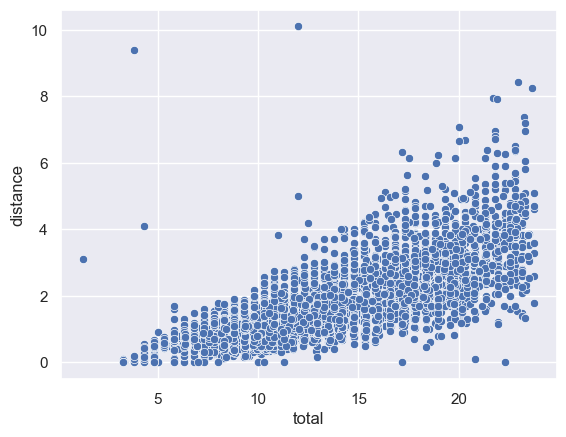

In [51]:
# Диаграмма Scatterplot . Сначала уберем разбросы - уберем 5% значений

# quartile_95_Scatterplot = taxi['total'].quantile(.95)
# taxi = taxi[taxi['total'] <= quartile_95_Scatterplot]

sns.scatterplot(taxi, x='total', y='distance')


<Axes: xlabel='total', ylabel='distance'>

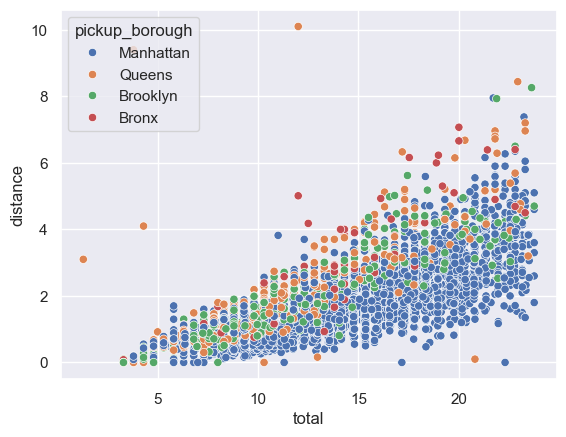

In [52]:
sns.scatterplot(taxi, x='total', y='distance', hue='pickup_borough')

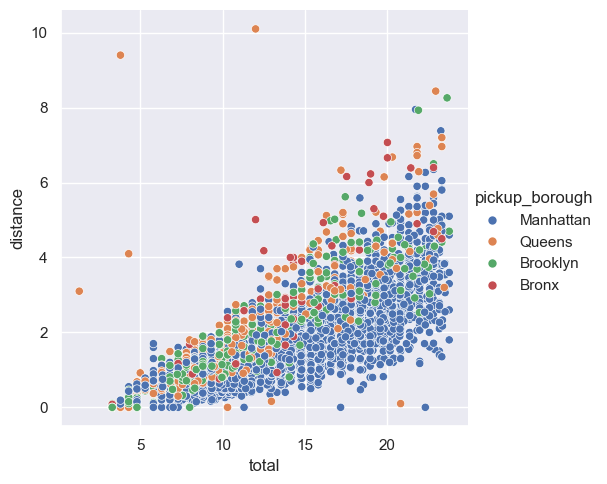

In [53]:
# Эта функция позволят разбивать данные по категориям ге только с помощью цвета, а езще и с помощью разбивки на строки или столбцы. 

sns.relplot(taxi, x='total', y='distance', hue='pickup_borough', kind='scatter')


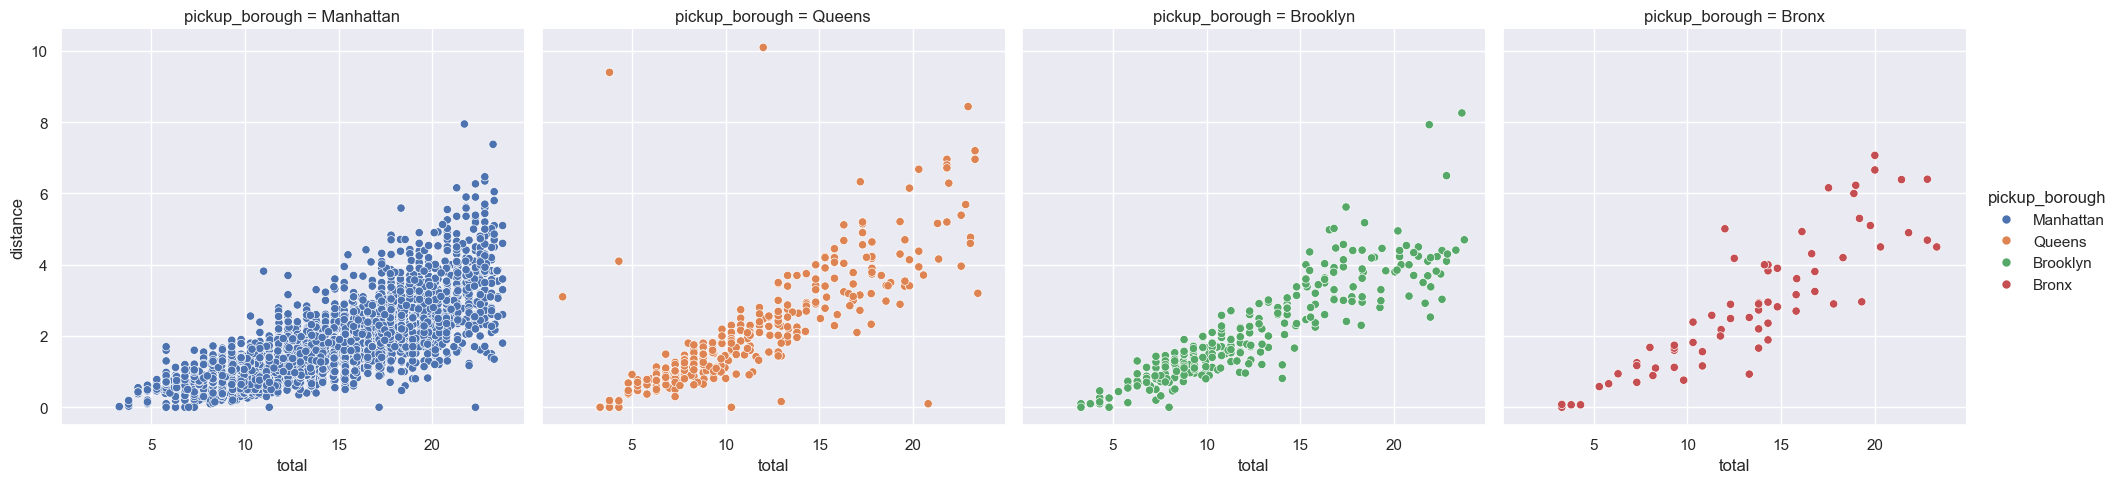

In [48]:
sns.relplot(taxi, x='total', y='distance', hue='pickup_borough', kind='scatter', col='pickup_borough')


<Axes: xlabel='pickup_borough', ylabel='total'>

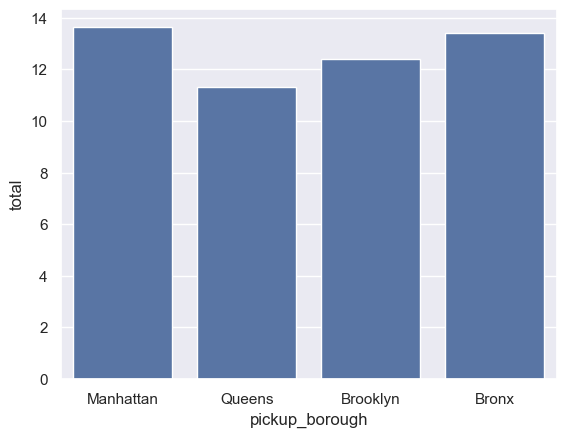

In [ ]:
sns.barplot(taxi, x='pickup_borough', y='total',  errorbar=None)  #  Это средняя цена поездки для района, так как функция среднего рассчитывается по умолчанию

<Axes: xlabel='pickup_borough', ylabel='total'>

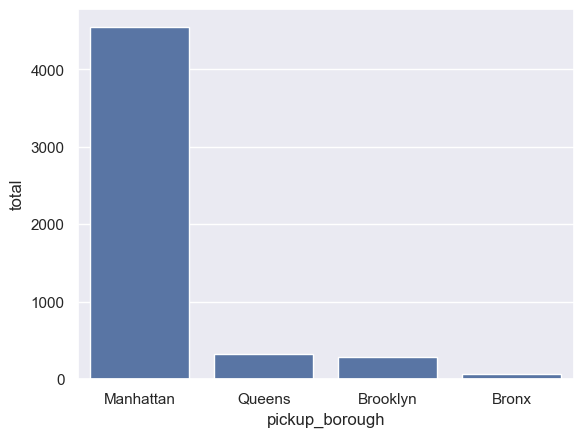

In [57]:
sns.barplot(taxi, x='pickup_borough', y='total', estimator=lambda x: len(x))


In [60]:
import numpy as np

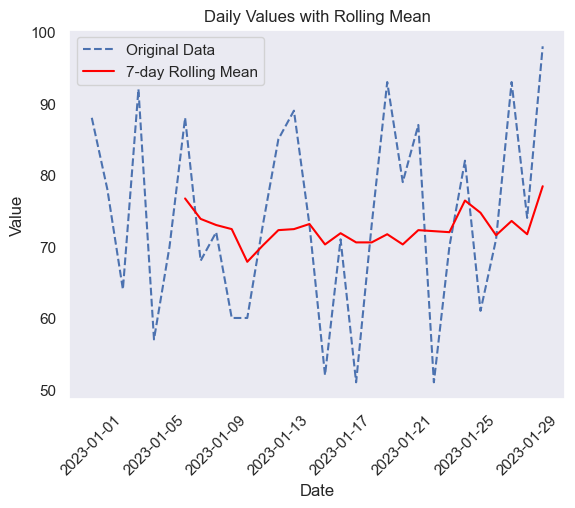

In [72]:
# Пример с rolling()

np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=30)
values = np.random.randint(50, 100, size=30)

# Создаём DataFrame
data = pd.DataFrame({'date': dates, 'value': values})
# Строим график исходных данных
plt.plot(data['date'], data['value'], label='Original Data', linestyle='--')
plt.xticks(rotation=45)
data['rolling_mean'] = data['value'].rolling(window=7).mean()
plt.plot(data['date'], data['rolling_mean'], label='7-day Rolling Mean', color='red')
plt.legend()
plt.title('Daily Values with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.show()
